In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import h5py

import yt

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

from yt.units import Mpc, km, s
from yt.utilities.physical_constants import mp, G, kb, c

In [2]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (1.0, "m/s"),
    "mass": (1.0, "Msun"),
}

ds=yt.load('output3/snapshot_000.hdf5', unit_base=unit_base, unit_system="cgs")
ad = ds.all_data()

yt : [INFO     ] 2022-05-10 18:48:06,636 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-05-10 18:48:07,250 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-10 18:48:07,258 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-05-10 18:48:07,267 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-10 18:48:07,275 Parameters: domain_right_edge         = [0.0101112 0.0101112 0.0101112]
yt : [INFO     ] 2022-05-10 18:48:07,279 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-05-10 18:48:07,360 Allocating for 1.132e+04 particles


yt : [INFO     ] 2022-05-10 18:48:25,284 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-10 18:48:25,287 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-10 18:48:25,295 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-10 18:48:25,298 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-10 18:48:25,352 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



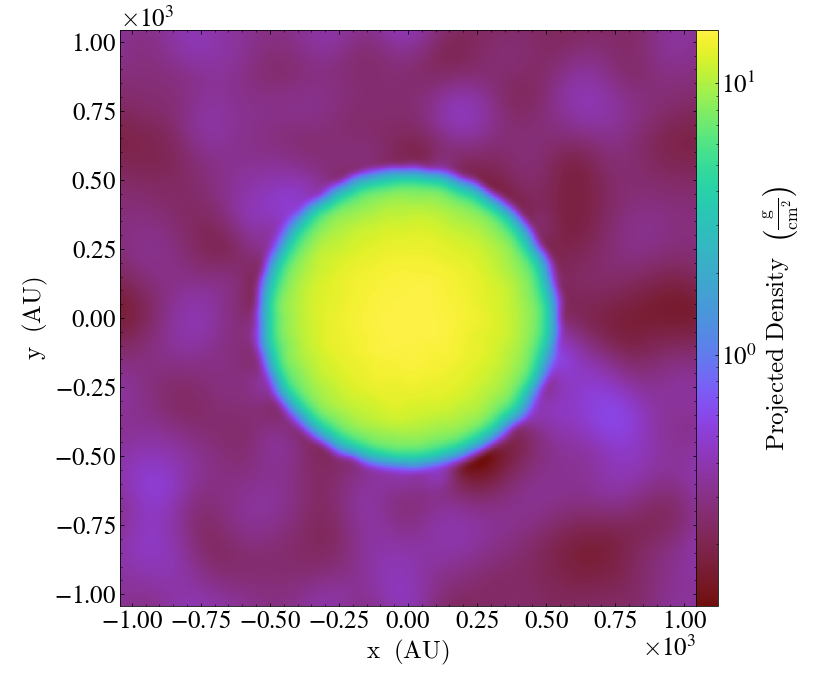

In [3]:
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))
p.show()

In [49]:
density_vals_001 = np.array([])
time_vals_001 = np.array([])
L_vals_001 = np.array([])
I_vals_001 = np.array([])

yt.set_log_level("error")

for i in np.arange(0,501,20):
    print(i) 
    name=i  
    ds = yt.load("output3-S0.01/snapshot_{:03d}.hdf5".format(name,name), unit_base=unit_base, unit_system="cgs")
    ad = ds.all_data()
    
    
    time = ds.current_time.in_units('yr')
    density=ad[('gas','density')]   
    point_obj = ds.point(ad.center)
    density_at_center = np.mean(point_obj['gas', 'density'])
    
    m=ad[('PartType0', 'particle_mass')].in_units('g')
    x=ad[('PartType0', 'particle_position_x')].in_units('cm')
    y=ad[('PartType0', 'particle_position_y')].in_units('cm')
    vx=ad[('PartType0', 'particle_velocity_x')].in_units('cm/s')
    vy=ad[('PartType0', 'particle_velocity_y')].in_units('cm/s')
    L=np.sum((x*vy-y*vx)*m)
    I=np.sum((x**2+y**2)*m)
    
    
    density_vals_001 = np.append(density_vals_001,density_at_center)
    time_vals_001 = np.append(time_vals_001,time)
    
    L_vals_001 = np.append(L_vals_001,L)
    I_vals_001 = np.append(I_vals_001,I)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


In [50]:
density_vals_01 = np.array([])
time_vals_01 = np.array([])
L_vals_01 = np.array([])
I_vals_01 = np.array([])

yt.set_log_level("error")

for i in np.arange(0,501,20):
    print(i) 
    name=i  
    ds = yt.load("output3-S0.1/snapshot_{:03d}.hdf5".format(name,name), unit_base=unit_base, unit_system="cgs")
    ad = ds.all_data()
    
    
    time = ds.current_time.in_units('yr')
    density=ad[('gas','density')]   
    point_obj = ds.point(ad.center)
    density_at_center = np.mean(point_obj['gas', 'density'])
    
    m=ad[('PartType0', 'particle_mass')].in_units('g')
    x=ad[('PartType0', 'particle_position_x')].in_units('cm')
    y=ad[('PartType0', 'particle_position_y')].in_units('cm')
    vx=ad[('PartType0', 'particle_velocity_x')].in_units('cm/s')
    vy=ad[('PartType0', 'particle_velocity_y')].in_units('cm/s')
    L=np.sum((x*vy-y*vx)*m)
    I=np.sum((x**2+y**2)*m)
    
    
    density_vals_01 = np.append(density_vals_01,density_at_center)
    time_vals_01 = np.append(time_vals_01,time)
    
    L_vals_01 = np.append(L_vals_01,L)
    I_vals_01 = np.append(I_vals_01,I)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


In [51]:
density_vals_05 = np.array([])
time_vals_05 = np.array([])
L_vals_05 = np.array([])
I_vals_05 = np.array([])

yt.set_log_level("error")

for i in np.arange(0,501,20):
    print(i) 
    name=i  
    ds = yt.load("output3-S0.5/snapshot_{:03d}.hdf5".format(name,name), unit_base=unit_base, unit_system="cgs")
    ad = ds.all_data()
    
    
    time = ds.current_time.in_units('yr')
    density=ad[('gas','density')]   
    point_obj = ds.point(ad.center)
    density_at_center = np.mean(point_obj['gas', 'density'])
    
    m=ad[('PartType0', 'particle_mass')].in_units('g')
    x=ad[('PartType0', 'particle_position_x')].in_units('cm')
    y=ad[('PartType0', 'particle_position_y')].in_units('cm')
    vx=ad[('PartType0', 'particle_velocity_x')].in_units('cm/s')
    vy=ad[('PartType0', 'particle_velocity_y')].in_units('cm/s')
    L=np.sum((x*vy-y*vx)*m)
    I=np.sum((x**2+y**2)*m)
    
    
    density_vals_05 = np.append(density_vals_05,density_at_center)
    time_vals_05 = np.append(time_vals_05,time)
    
    L_vals_05 = np.append(L_vals_05,L)
    I_vals_05 = np.append(I_vals_05,I)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


In [52]:
density_vals = np.array([])
time_vals = np.array([])
L_vals = np.array([])
I_vals = np.array([])

yt.set_log_level("error")

for i in np.arange(0,501,20):
    print(i) 
    name=i  
    ds = yt.load("output3/snapshot_{:03d}.hdf5".format(name,name), unit_base=unit_base, unit_system="cgs")
    ad = ds.all_data()
    
    
    time = ds.current_time.in_units('yr')
    density=ad[('gas','density')]   
    point_obj = ds.point(ad.center)
    density_at_center = np.mean(point_obj['gas', 'density'])
    
    m=ad[('PartType0', 'particle_mass')].in_units('g')
    x=ad[('PartType0', 'particle_position_x')].in_units('cm')
    y=ad[('PartType0', 'particle_position_y')].in_units('cm')
    vx=ad[('PartType0', 'particle_velocity_x')].in_units('cm/s')
    vy=ad[('PartType0', 'particle_velocity_y')].in_units('cm/s')
    L=np.sum((x*vy-y*vx)*m)
    I=np.sum((x**2+y**2)*m)
    
    
    density_vals = np.append(density_vals,density_at_center)
    time_vals = np.append(time_vals,time)
    
    L_vals = np.append(L_vals,L)
    I_vals = np.append(I_vals,I)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


/work2/08308/joohyunl/stampede2/python-packages/yt/yt/sample_data/api.py:146: UserWarning: Storage directory from yt config doesn't exist (currently set to '/does/not/exist'). Current working directory will be used instead.
  "Storage directory from yt config doesn't exist "


FileNotFoundError: No such file or directory: 'output3/snapshot_500.hdf5'.
(Also tried '/work2/08308/joohyunl/stampede2/class/comp/Project/output3/snapshot_500.hdf5').

In [54]:
def analytic_fftime(rho_rho0):
    eta = np.arccos(rho_rho0**(-1/6))
    tp_tff = 2/np.pi * (eta + 1/2 * np.sin(2*eta) )
    return tp_tff

rho_rho0_max = np.max(density_vals)/density_vals[0]
rho_rho0_vals = np.logspace(-1,np.log10(rho_rho0_max),1000)
atimes = analytic_fftime(rho_rho0_vals)

a_rho_vals = rho_rho0_vals * density_vals[0]
a_t_vals = atimes * 2100


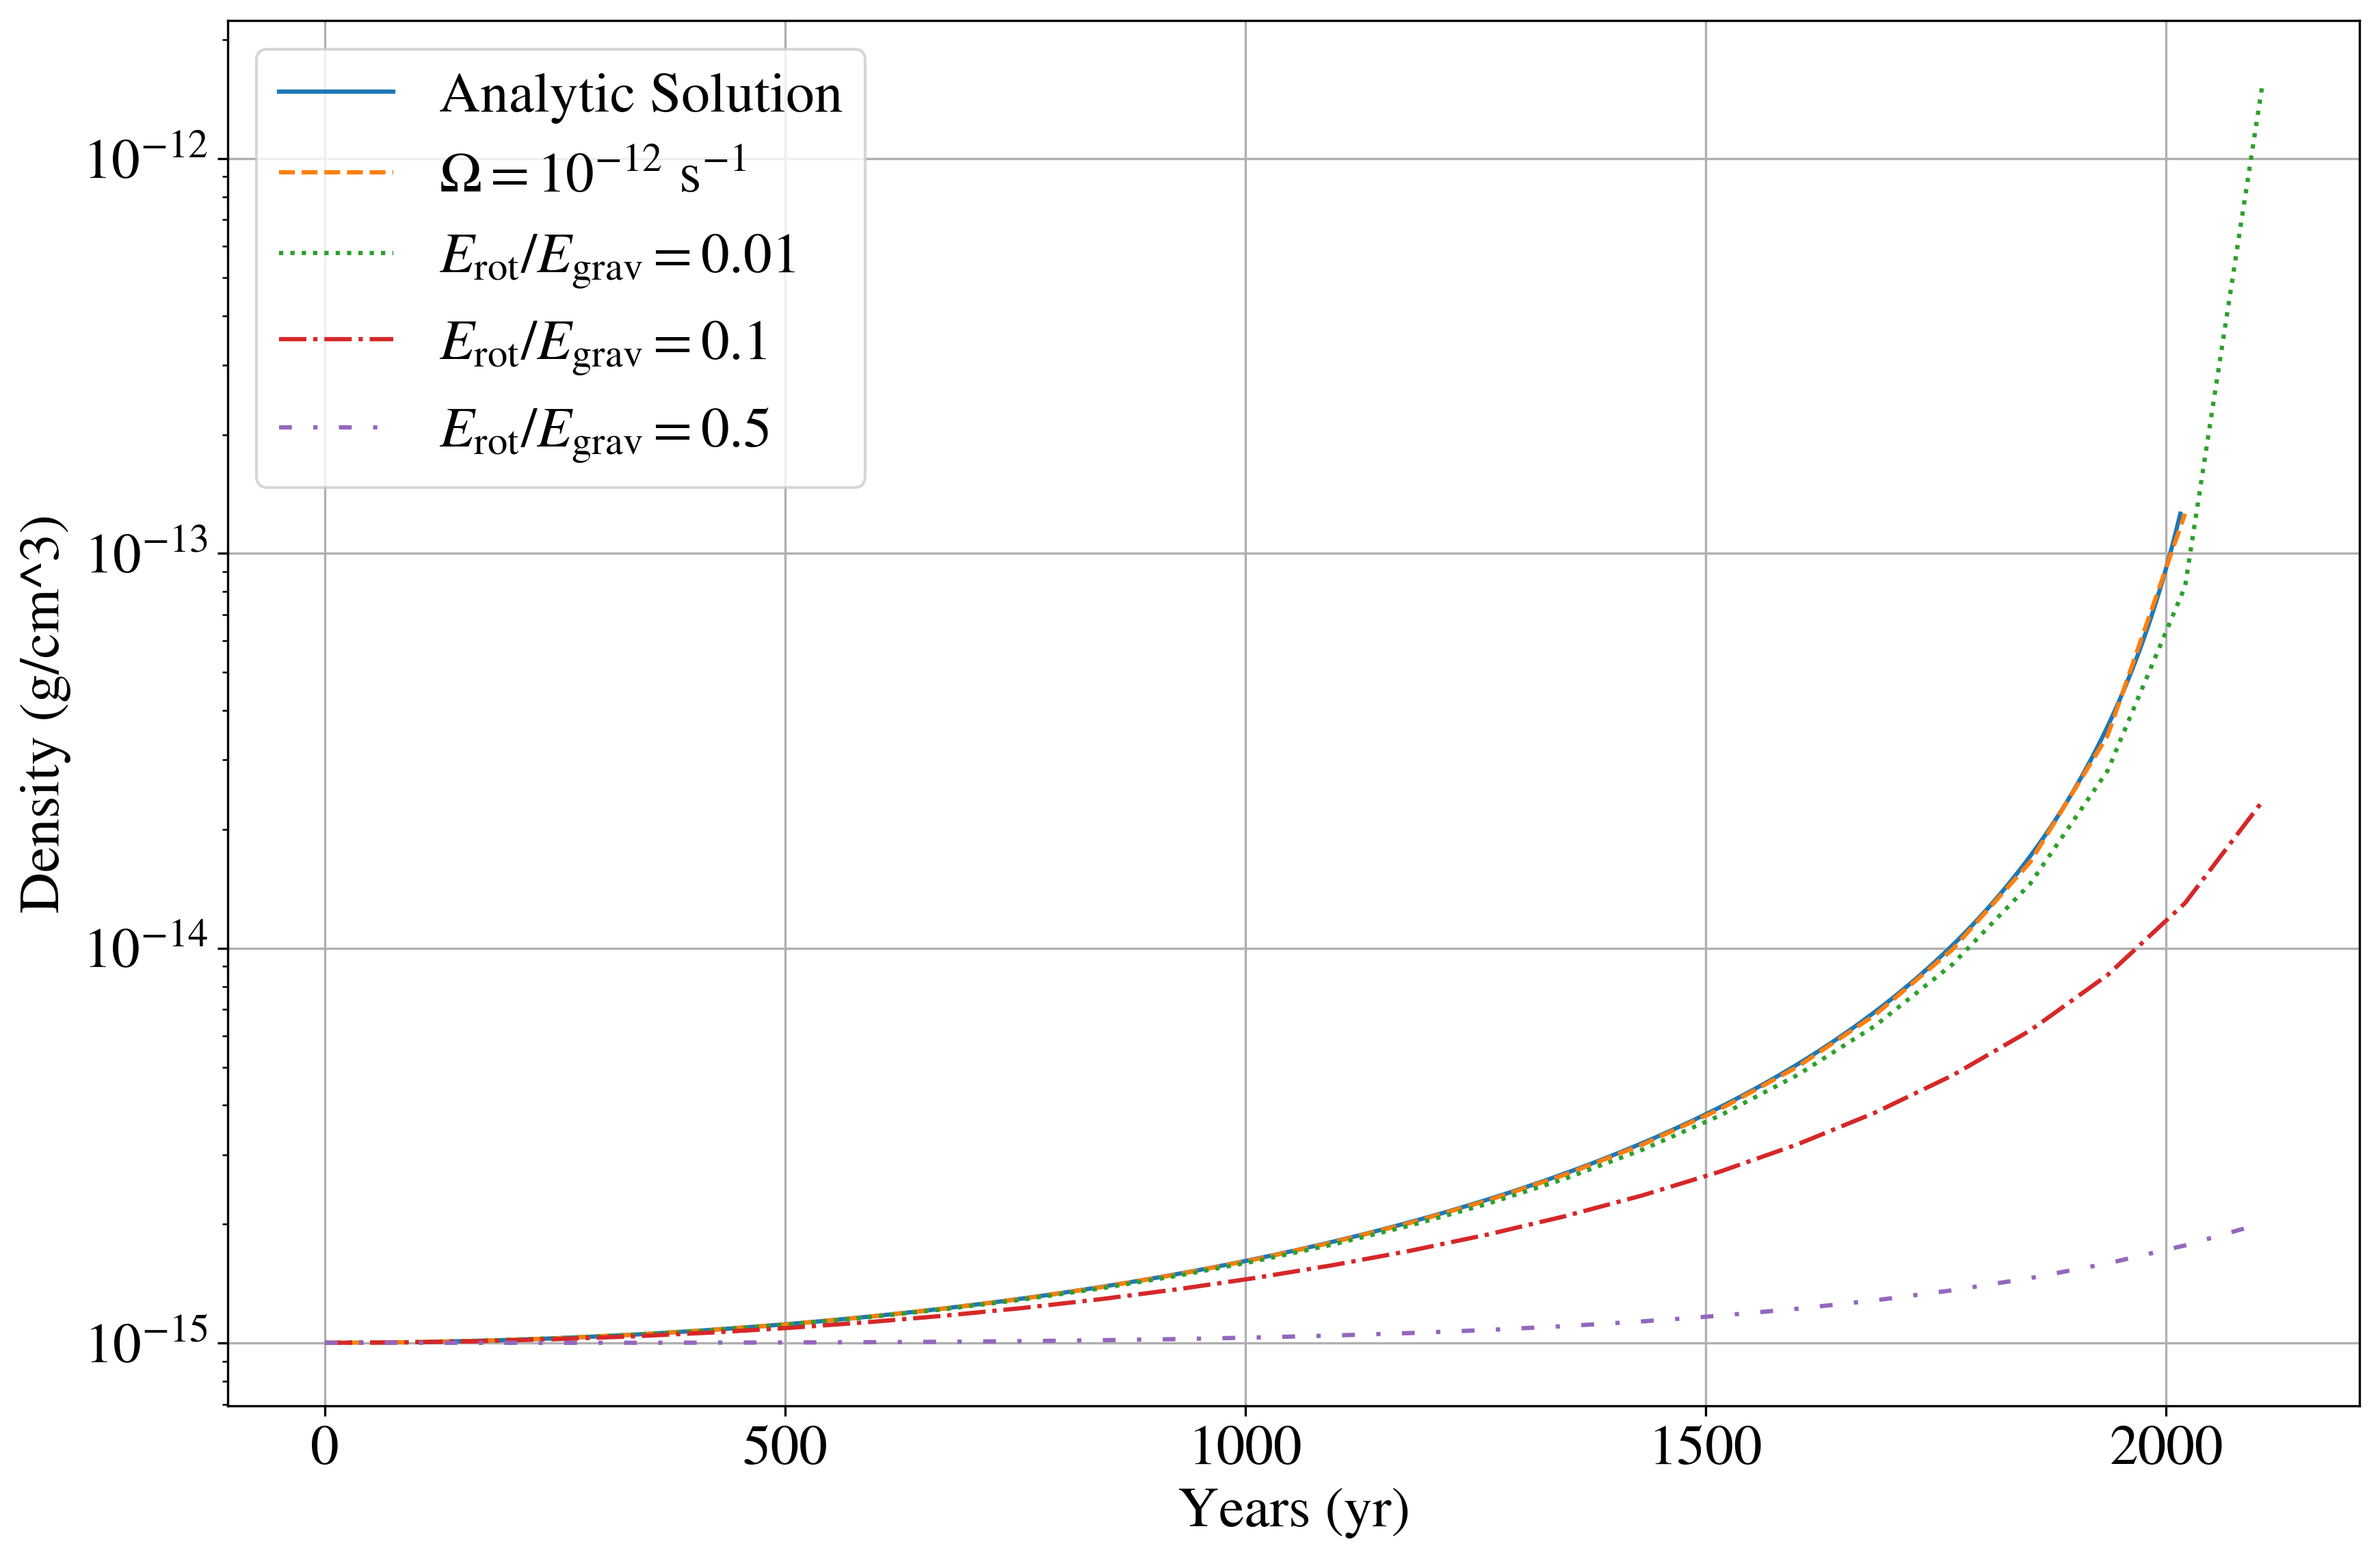

In [73]:
# figure
fig=plt.figure(figsize=(12,8),dpi=300)
ax1=fig.add_subplot(111)

ax1.plot(a_t_vals,a_rho_vals,label='Analytic Solution')


ax1.plot(time_vals,density_vals, linestyle='dashed', label=r'$\Omega = 10^{-12}$ s$^{-1}$')
ax1.plot(time_vals_001,density_vals_001, linestyle='dotted', label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.01$')
ax1.plot(time_vals_01,density_vals_01, linestyle='dashdot', label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.1$')
ax1.plot(time_vals_05,density_vals_05, linestyle=(0, (3, 5, 1, 5)), label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.5$')


ax1.legend()
ax1.grid()

ax1.set_yscale('log')

ax1.set_xlabel(r'Years (yr)')
ax1.set_ylabel(r'Density (g/cm^3)')

plt.tight_layout()

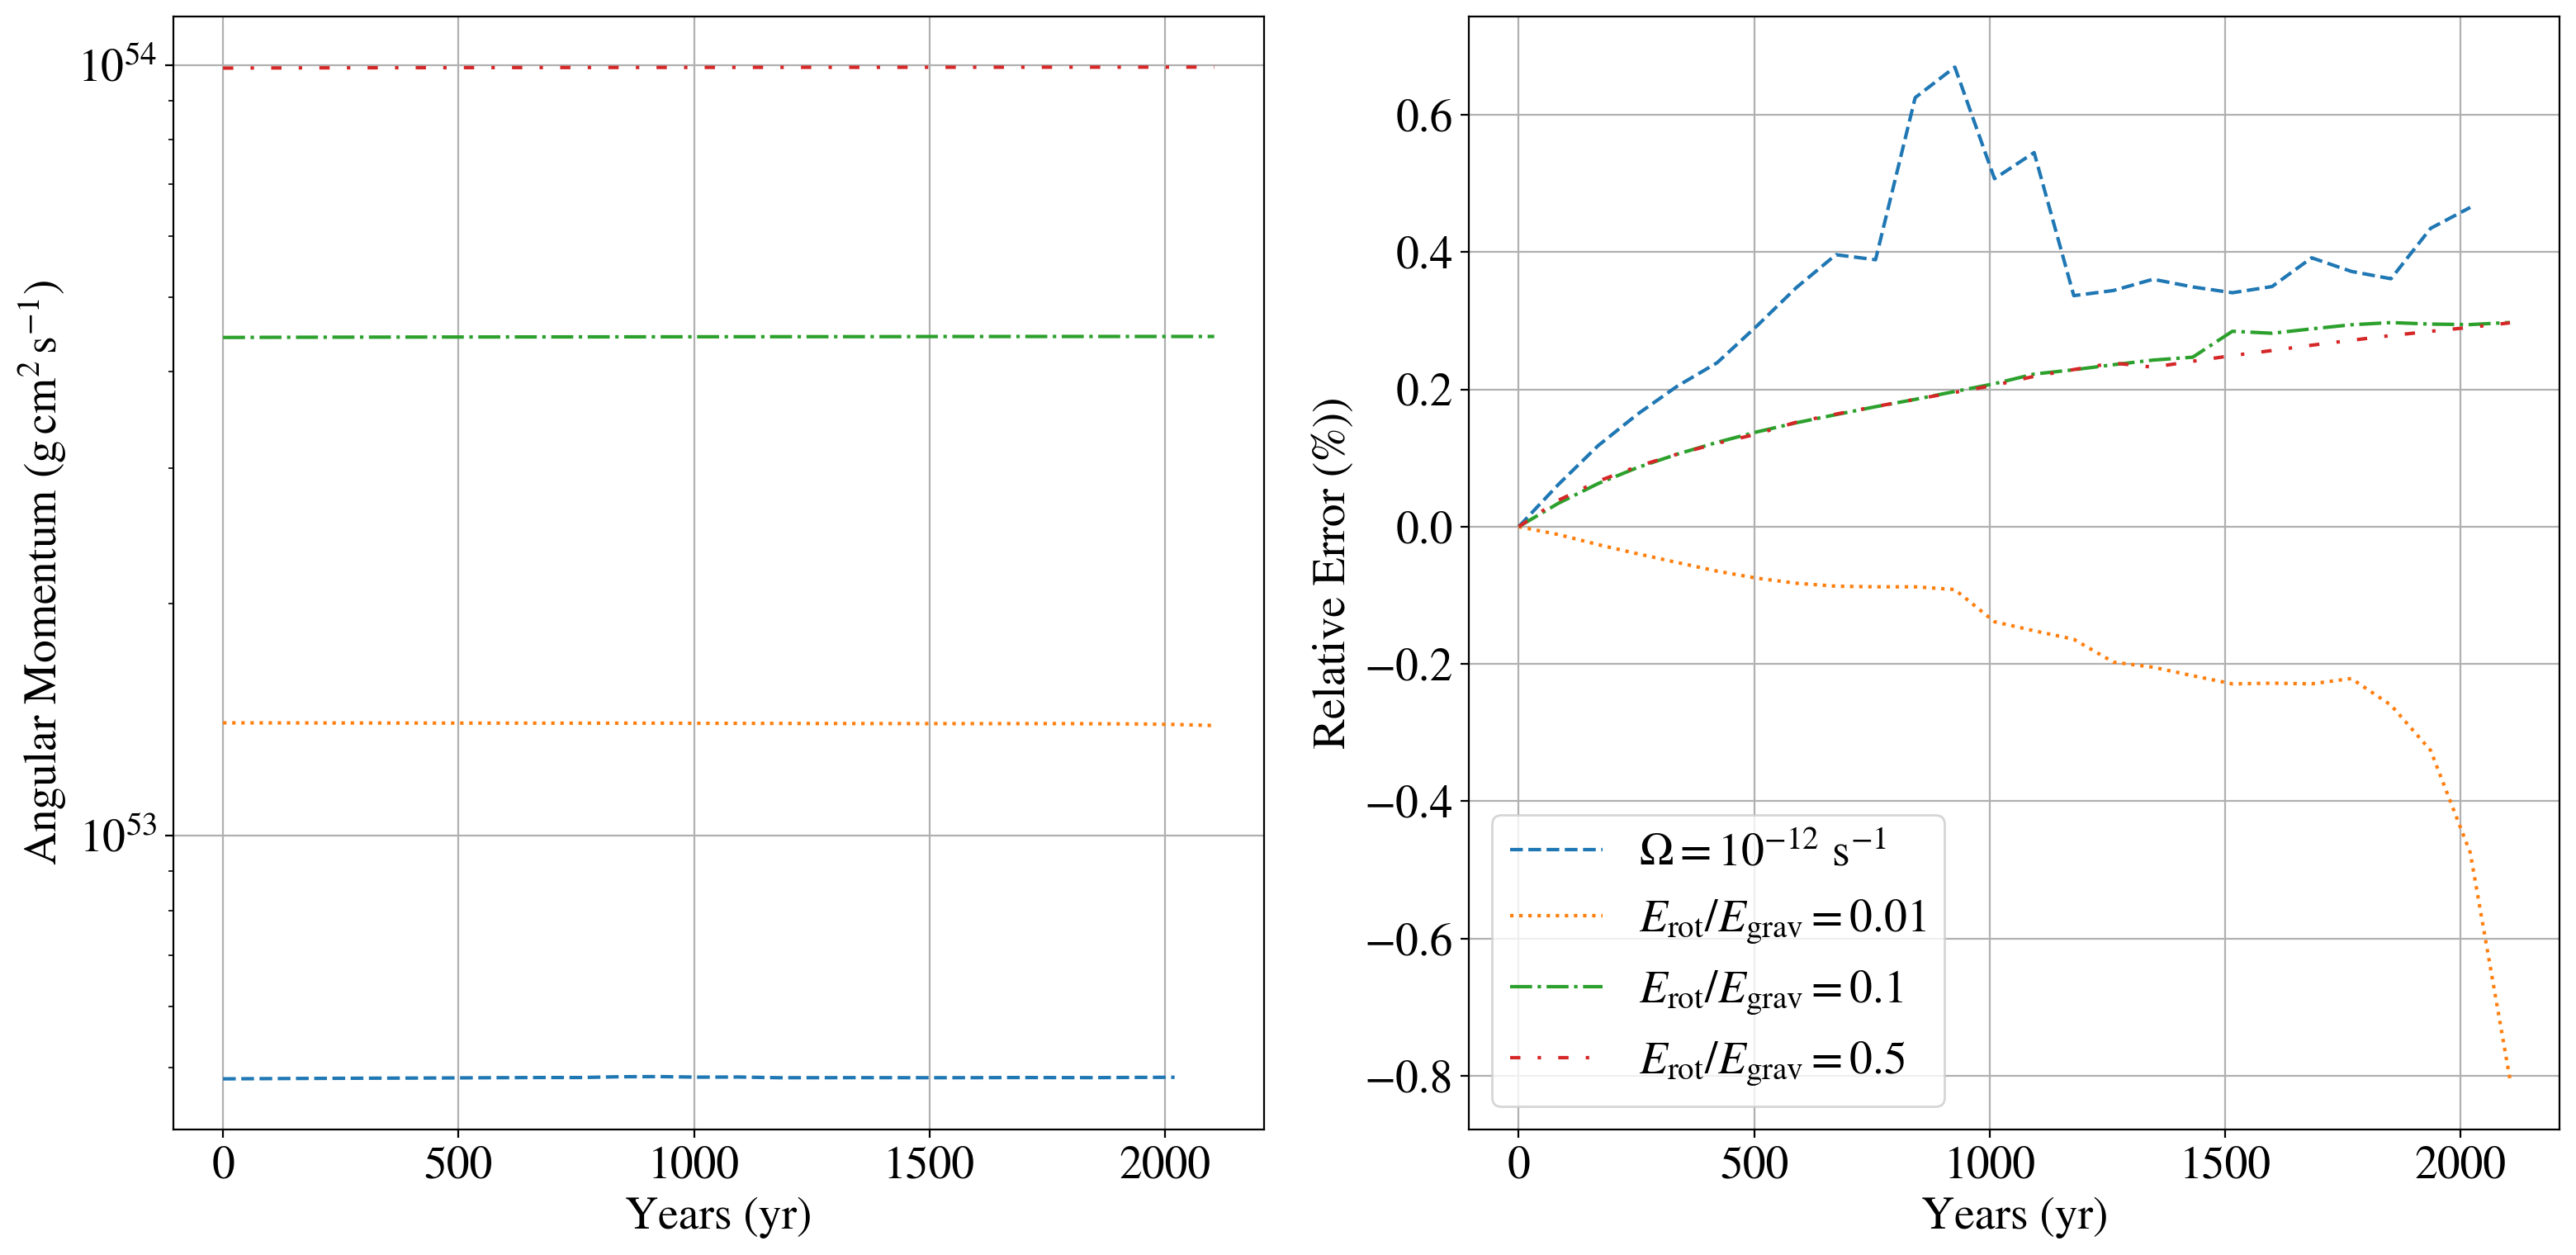

In [76]:
# figure
fig=plt.figure(figsize=(16,8),dpi=200)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

L_diff=(L_vals-L_vals[0])/L_vals*100
L_diff_001=(L_vals_001-L_vals_001[0])/L_vals_001*100
L_diff_01=(L_vals_01-L_vals_01[0])/L_vals_01*100
L_diff_05=(L_vals_05-L_vals_05[0])/L_vals_05*100

ax1.plot(time_vals,L_vals, linestyle='dashed', label=r'$\Omega = 10^{-12}$ s$^{-1}$')
ax1.plot(time_vals_001,L_vals_001, linestyle='dotted', label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.01$')
ax1.plot(time_vals_01,L_vals_01, linestyle='dashdot', label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.1$')
ax1.plot(time_vals_05,L_vals_05, linestyle=(0, (3, 5, 1, 5)), label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.5$')


ax2.plot(time_vals,L_diff, linestyle='dashed', label=r'$\Omega = 10^{-12}$ s$^{-1}$')
ax2.plot(time_vals_001,L_diff_001, linestyle='dotted', label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.01$')
ax2.plot(time_vals_01,L_diff_01, linestyle='dashdot', label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.1$')
ax2.plot(time_vals_05,L_diff_05, linestyle=(0, (3, 5, 1, 5)), label=r'$E_{\rm {rot}}/E_{\mathrm {grav}}=0.5$')


ax2.legend()
ax1.grid()
ax2.grid()

ax1.set_yscale('log')

ax1.set_xlabel(r'Years (yr)')
ax2.set_xlabel(r'Years (yr)')
ax1.set_ylabel(r'Angular Momentum (${\rm {g} \, {cm}}^{2}\,{\mathrm {s}}^{-1}$)')
ax2.set_ylabel(r'Relative Error (%))')

plt.tight_layout()

In [15]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (1.0, "m/s"),
    "mass": (1.0, "Msun"),
}

ds=yt.load('output1/snapshot_148.hdf5')
ad = ds.all_data()

yt : [INFO     ] 2022-05-01 23:13:27,795 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-05-01 23:13:27,799 Assuming length units are in kpc (physical)
yt : [INFO     ] 2022-05-01 23:13:28,311 Parameters: current_time              = 2.1237179006747242e-06
yt : [INFO     ] 2022-05-01 23:13:28,318 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-05-01 23:13:28,327 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-01 23:13:28,336 Parameters: domain_right_edge         = [0.0101112 0.0101112 0.0101112]
yt : [INFO     ] 2022-05-01 23:13:28,340 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-05-01 23:13:28,410 Allocating for 1.134e+04 particles


yt : [INFO     ] 2022-05-01 23:13:45,406 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:45,409 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:45,416 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:45,419 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:45,464 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



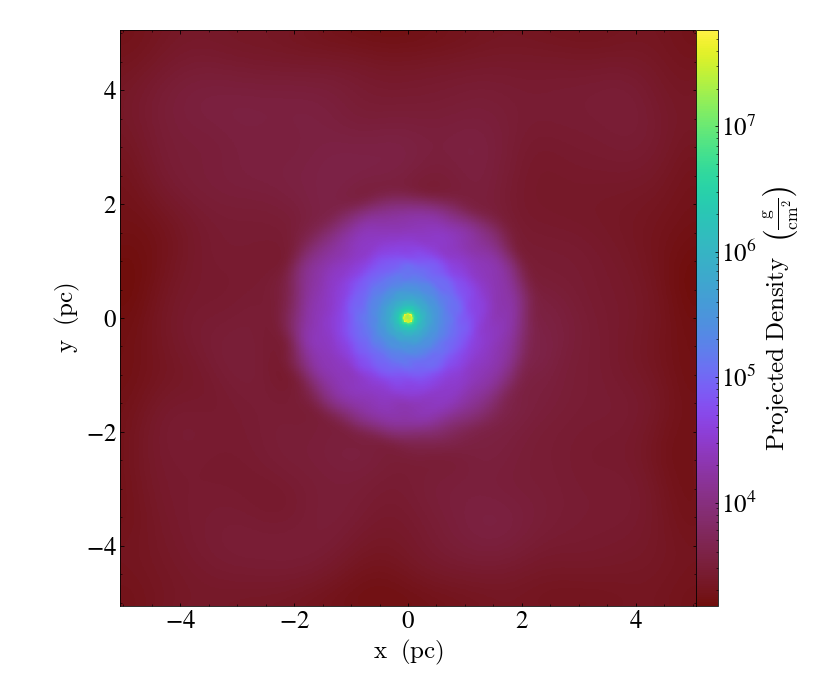

In [16]:
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))
p.show()

yt : [INFO     ] 2022-05-01 23:13:53,384 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:53,387 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:53,394 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:53,397 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-01 23:13:53,437 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



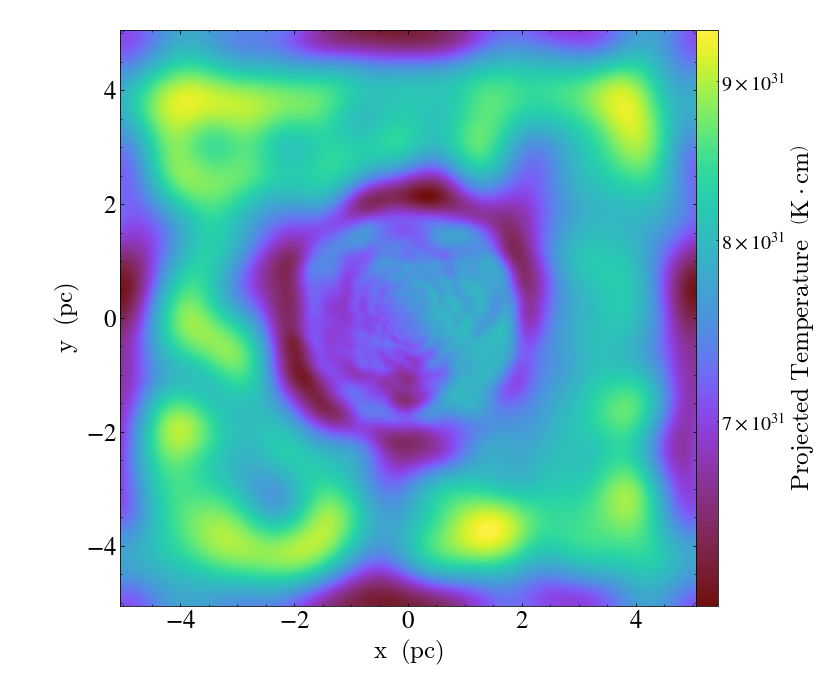

In [17]:
p = yt.ProjectionPlot(ds, 'z', ('gas','temperature'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','temperature'))
p.show()

In [90]:
def _MagneticFieldStrength(field, data):
    return (
        (ad[('all','MagneticField')][:,0]**2+ad[('all','MagneticField')][:,1]**2+ad[('all','MagneticField')][:,2]**2)**0.5
    )

ds.add_field(
    name=("all", "MagneticFieldStrength"),
    function=_MagneticFieldStrength,
    sampling_type="local",
)

yt : [WARNING  ] 2022-04-16 02:04:08,386 Field ('all', 'MagneticFieldStrength') already exists. To override use `force_override=True`.


ReferenceError: weakly-referenced object no longer exists

yt : [INFO     ] 2022-04-16 01:38:29,938 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,941 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,947 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,950 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,960 Splatting (('all', 'MagneticFieldStrength')) onto a 800 by 800 mesh using method 'ngp'



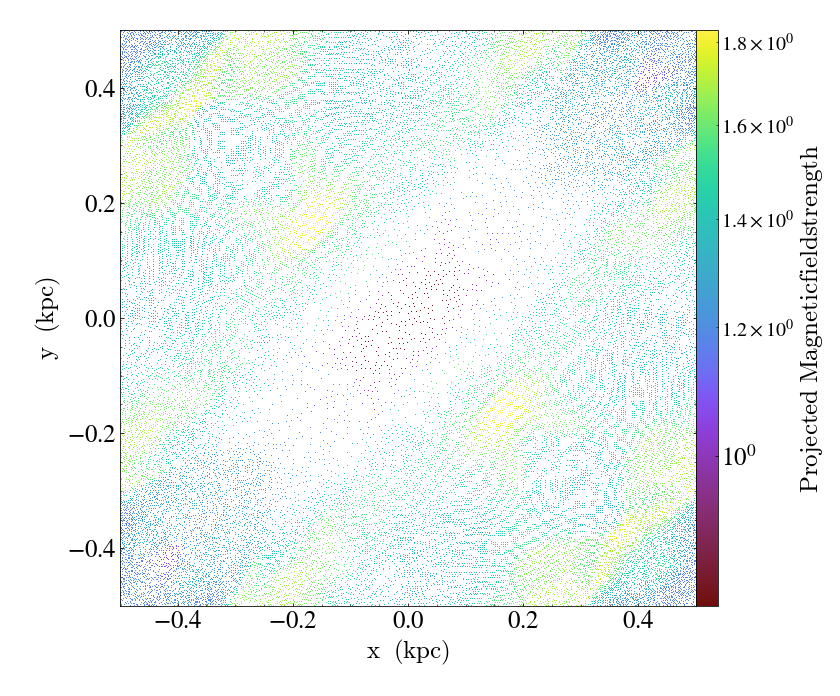

<Figure size 432x288 with 0 Axes>

In [68]:
kwargs={'markersize': 5}
p = yt.ParticlePlot(ds, ("all", "particle_position_x"), ("all", "particle_position_y"), ('all','MagneticFieldStrength'), fontsize=25)

p.show()
plt.tight_layout()

In [5]:
ds.derived_field_list

[('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'ParticleChildIDsNumber'),
 ('PartType0', 'ParticleIDGenerationNumber'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'Temperature'),
 ('PartType0', 'Velocities'),
 ('PartType0', 'angular_momentum'),
 ('PartType0', 'angular_momentum_magnitude'),
 ('PartType0', 'angular_momentum_x'),
 ('PartType0', 'angular_momentum_y'),
 ('PartType0', 'angular_momentum_z'),
 ('PartType0', 'cylindrical_radius'),
 ('PartType0', 'cylindrical_theta'),
 ('PartType0', 'cylindrical_velocity_theta'),
 ('PartType0', 'cylindrical_velocity_z'),
 ('PartType0', 'cylindrical_z'),
 ('PartType0', 'density'),
 ('PartType0', 'index'),
 ('PartType0', 'mass'),
 ('PartType0', 'ones'),
 ('PartType0', 'particle_angular_momentum'),
 ('PartType0', 'particle_angular_momentum_magnitude'),
 ('PartType0', 'particle_angular_momentum_x'),
 ('PartType0', 'particle_ang